In [238]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import os
import copy
from re import sub
from decimal import Decimal
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import geopandas
from dataprep.clean import clean_country

pd.set_option('display.max_columns', None)


In [239]:
def curr_to_dec(money):
    return float(sub(r'[^\d.]', '', money))
def gdp_preproc(gdp_df):
    gdp_df = gdp_df[['GDP (nominal, 2017)','GDP per capita','Country']]
    gdp_df['GDP (nominal, 2017)'] = gdp_df['GDP (nominal, 2017)'].apply(curr_to_dec)
    gdp_df['GDP per capita'] = gdp_df['GDP per capita'].apply(curr_to_dec)
    gdp_df = clean_country(gdp_df,"Country",output_format="alpha-3")
    return gdp_df
def preproc_col(df):
    return df.rename(columns={"Country,Other":"Country"}).drop(columns=['Unnamed: 0'])
def merge_gdp(df,gdp_df=pd.read_csv("./data/gdp.csv")):
    return gdp_preproc(gdp_df).merge(df,on='Country_clean')
def add_death_per_cases(df):
    df['Deaths/Cases'] = df['TotalDeaths']/df['TotalCases']
    return df
def duy_preproc(df):
    result = copy.deepcopy(df)
    result = result.drop(df.tail(8).index)    
    result = preproc_col(result)
    result = add_death_per_cases(result)
    result = clean_country(result,"Country",output_format="alpha-3")
    result = result.drop(columns=['Country'])
    result = merge_gdp(result)
    return result.rename(columns={"Country_clean":"CODE"})

# Load data và preprocess

In [240]:
df = pd.read_csv('./data/2022-04-27.csv')
df = duy_preproc(df)
df.columns

  0%|          | 0/9 [00:00<?, ?it/s]

Country Cleaning Report:
	221 values cleaned (93.64%)
	13 values unable to be parsed (5.51%), set to NaN
Result contains 222 (94.07%) values in the correct format and 14 null values (5.93%)


/home/duy/anaconda3/envs/dv_lab01/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/duy/anaconda3/envs/dv_lab01/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


  0%|          | 0/9 [00:00<?, ?it/s]

Country Cleaning Report:
	190 values cleaned (100.0%)
Result contains 190 (100.0%) values in the correct format and 0 null values (0.0%)


Index(['GDP (nominal, 2017)', 'GDP per capita', 'Country', 'CODE', '#',
       'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered',
       'NewRecovered', 'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop',
       'Deaths/1M pop', 'TotalTests', 'Tests/ 1M pop', 'Population',
       'Continent', '1 Caseevery X ppl', '1 Deathevery X ppl',
       '1 Testevery X ppl', 'New Cases/1M pop', 'New Deaths/1M pop',
       'Active Cases/1M pop', 'Deaths/Cases'],
      dtype='object')

In [320]:
df

,"GDP (nominal, 2017)",GDP per capita,Country,CODE,#,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Deaths/Cases
0,1.948539e+13,59939.0,United States,USA,2.0,82888247,57738.0,1019774.0,311.0,80585919.0,36051.0,1282554.0,1520.0,247777.0,3048.0,1.003323e+09,2999223.0,3.345276e+08,North America,4.0,328.0,0.0,173.0,0.90,3834.0,0.012303
1,1.223770e+13,8612.0,China,CHN,1.0,207081,1824.0,4876.0,48.0,175431.0,3728.0,26774.0,318.0,144.0,3.0,1.600000e+08,111163.0,1.439324e+09,Asia,6951.0,295185.0,9.0,1.0,0.03,19.0,0.023546
2,4.872415e+12,38214.0,Japan,JPN,16.0,7725765,37258.0,29402.0,58.0,7263359.0,40195.0,433004.0,183.0,61426.0,234.0,4.688881e+07,372804.0,1.257734e+08,Asia,16.0,4278.0,3.0,296.0,0.50,3443.0,0.003806
3,3.693204e+12,44680.0,Germany,DEU,6.0,24488242,124863.0,135369.0,245.0,21885900.0,220700.0,2466973.0,1980.0,290591.0,1606.0,1.223324e+08,1451664.0,8.427047e+07,Europe,3.0,623.0,1.0,1482.0,3.00,29274.0,0.005528
4,2.650725e+12,1980.0,India,IND,3.0,43068799,3133.0,523693.0,39.0,42528126.0,2563.0,16980.0,698.0,30662.0,373.0,8.359741e+08,595150.0,1.404643e+09,Asia,33.0,2682.0,2.0,2.0,0.03,12.0,0.012159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,4.967270e+08,6951.0,Dominica,DMA,186.0,12033,22.0,63.0,NaN,11929.0,3.0,41.0,NaN,166406.0,871.0,1.881100e+05,2601402.0,7.231100e+04,North America,6.0,1148.0,0.0,304.0,NaN,567.0,0.005236
175,4.276598e+08,4193.0,Tonga,TON,193.0,9838,NaN,11.0,NaN,8721.0,NaN,1106.0,NaN,91202.0,102.0,4.234750e+05,3925790.0,1.078700e+05,Australia/Oceania,11.0,9806.0,0.0,NaN,NaN,10253.0,0.001118
176,3.925703e+08,1896.0,Sao Tome & Principe,STP,208.0,5957,NaN,73.0,NaN,5880.0,NaN,4.0,NaN,26295.0,322.0,2.903600e+04,128167.0,2.265480e+05,Africa,38.0,3103.0,8.0,NaN,NaN,18.0,0.012254
178,2.898235e+08,16275.0,Palau,PLW,211.0,4486,NaN,6.0,NaN,3913.0,NaN,567.0,1.0,245795.0,329.0,4.550000e+04,2493014.0,1.825100e+04,Australia/Oceania,4.0,3042.0,0.0,NaN,NaN,31067.0,0.001337


In [241]:
df = df.dropna(axis=0,subset=['Deaths/1M pop','Tot\xa0Cases/1M pop'])

In [314]:
def world_map_visualize(df,column):
    # first let us merge geopandas data with our data
# 'naturalearth_lowres' is geopandas datasets so we can use it directly
    world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
    # rename the columns so that we can merge with our data
    world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
    # then merge with our data 
    merge=pd.merge(world,df,on='CODE')
    # last thing we need to do is - merge again with our location data which contains each country’s latitude and longitude
    location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
    merge=merge.merge(location,on='name')
    # plot confirmed cases world map 
    merge.plot(column=column, scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='Reds')
    plt.title(column)

# add countries names and numbers 
    
    plt.show()

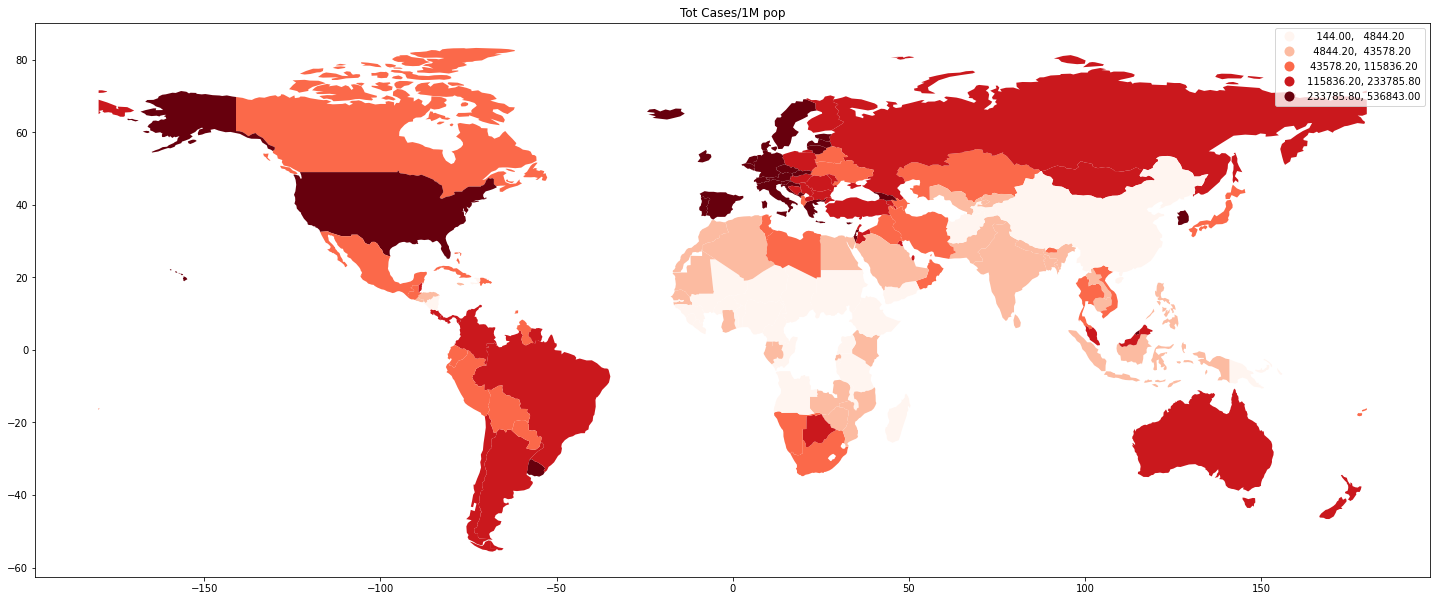

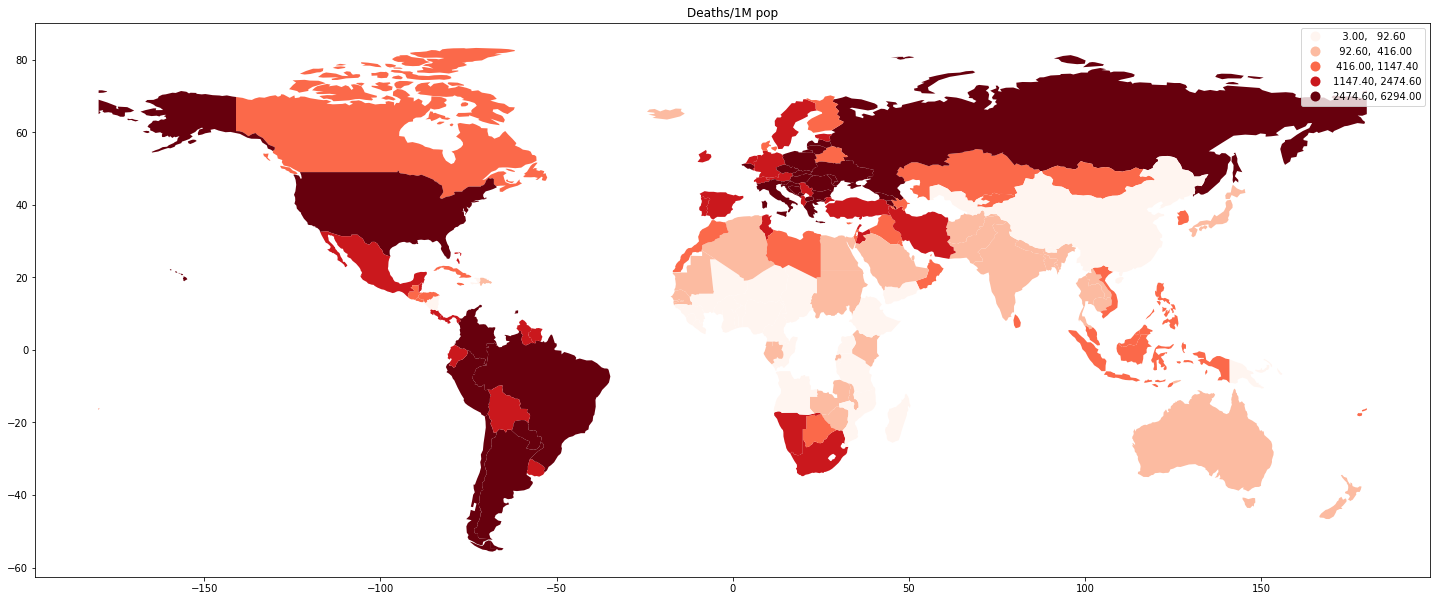

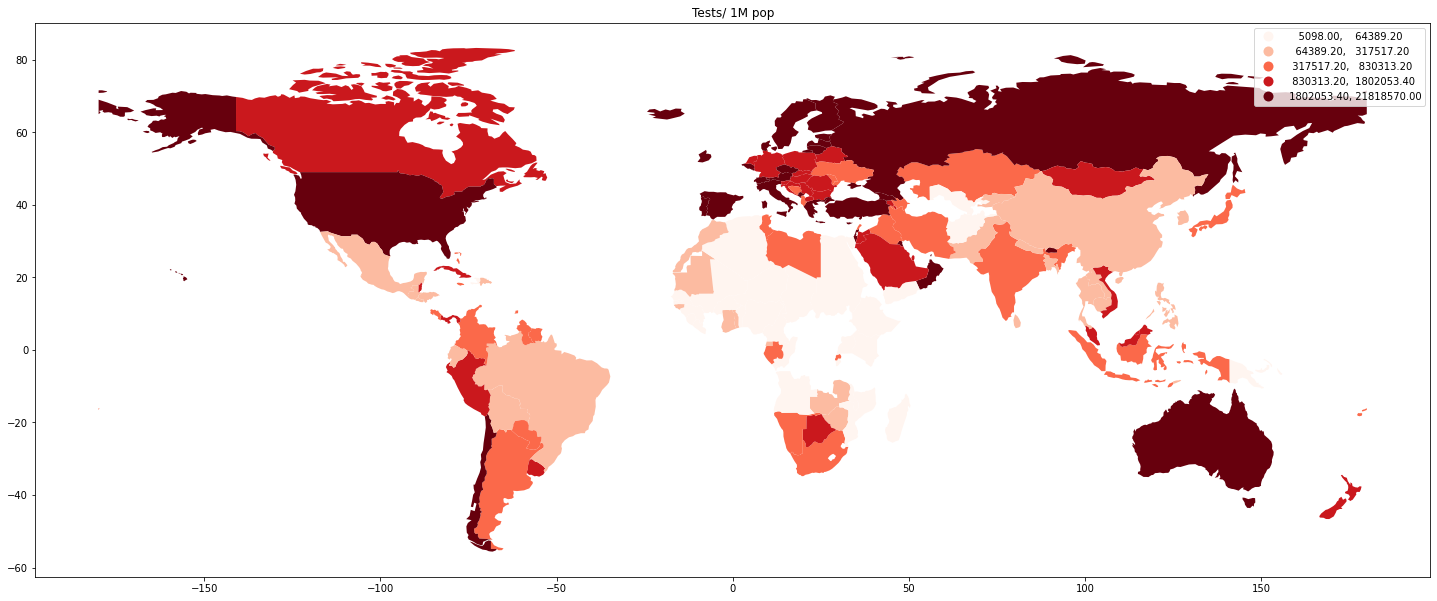

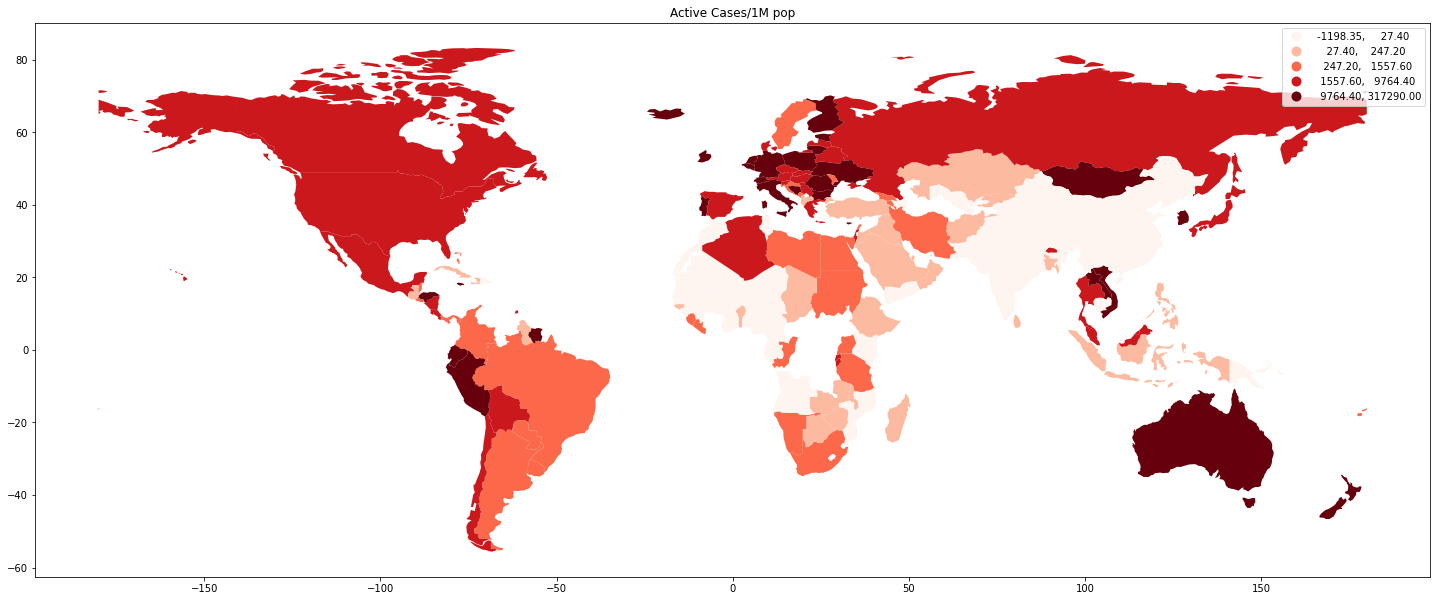

In [319]:
for col in ['Tot\xa0Cases/1M pop','Deaths/1M pop', 'Tests/ 1M pop','Active Cases/1M pop']:
    world_map_visualize(df,col)

In [242]:
# first let us merge geopandas data with our data
# 'naturalearth_lowres' is geopandas datasets so we can use it directly
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
# then merge with our data 
merge=pd.merge(world,df,on='CODE')
# last thing we need to do is - merge again with our location data which contains each country’s latitude and longitude
location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
merge=merge.merge(location,on='name')

<AxesSubplot:xlabel='Tot\xa0Cases/1M pop', ylabel='Deaths/Cases'>

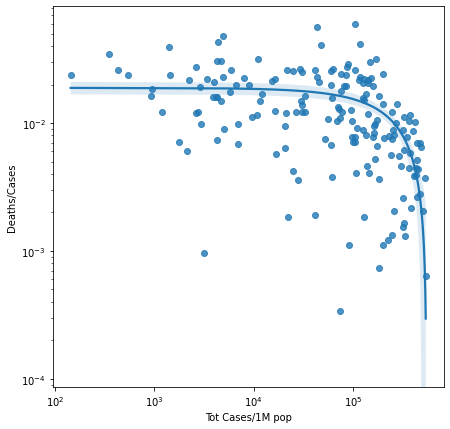

In [274]:
df_1 = copy.deepcopy(df)
df_1 = df_1.drop(df_1['Deaths/Cases'].idxmax())
df_1 = df_1.drop(df_1['Deaths/Cases'].idxmax())

f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="symlog",yscale='log')

sns.regplot(x='Tot\xa0Cases/1M pop', y='Deaths/Cases', data=df_1,ax = ax)

In [249]:
Y = stats.zscore(df['Deaths/Cases'])
X = stats.zscore(df['Tot\xa0Cases/1M pop'])
model_OLS = sm.OLS(Y,X)
result_OLS = model_OLS.fit()
result_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Deaths/Cases   R-squared (uncentered):                   0.124
Model:                            OLS   Adj. R-squared (uncentered):              0.119
Method:                 Least Squares   F-statistic:                              25.14
Date:                Tue, 03 May 2022   Prob (F-statistic):                    1.29e-06
Time:                        13:18:31   Log-Likelihood:                         -240.75
No. Observations:                 178   AIC:                                      483.5
Df Residuals:                     177   BIC:                                      486.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Tot Cases/1M pop    -0.3527      0.070     -5.014      0.000      -0.491      -0.214
==============================================================================
Omnibus:                      255.541   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23961.595
Skew:                           6.102   Prob(JB):                         0.00
Kurtosis:                      58.514   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [250]:
Y_pred = result_OLS.predict(X)

In [251]:
_std = np.sqrt((Y-Y_pred)**2)
_std

0      0.100855
1      0.138657
2      0.861019
3      0.187811
4      0.450053
         ...   
174    0.515194
175    0.943564
176    0.455415
178    0.544457
180    0.927586
Length: 178, dtype: float64

<AxesSubplot:xlabel='Tot\xa0Cases/1M pop'>

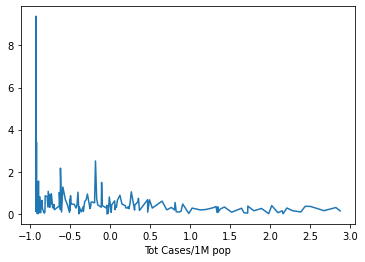

In [252]:
sns.lineplot(x = X,y = _std)

In [294]:
from sklearn.cluster import KMeans
X = merge[["Deaths/Cases","TotalCases"]]
kmeans = KMeans(n_clusters=7).fit(X)
merge['label'] = kmeans.labels_

In [321]:
df.columns.tolist()

['GDP (nominal, 2017)',
 'GDP per capita',
 'Country',
 'CODE',
 '#',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/ 1M pop',
 'Population',
 'Continent',
 '1 Caseevery X ppl',
 '1 Deathevery X ppl',
 '1 Testevery X ppl',
 'New Cases/1M pop',
 'New Deaths/1M pop',
 'Active Cases/1M pop',
 'Deaths/Cases']

/home/duy/anaconda3/envs/dv_lab01/lib/python3.7/site-packages/mapclassify/classifiers.py:239: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/home/duy/anaconda3/envs/dv_lab01/lib/python3.7/site-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)


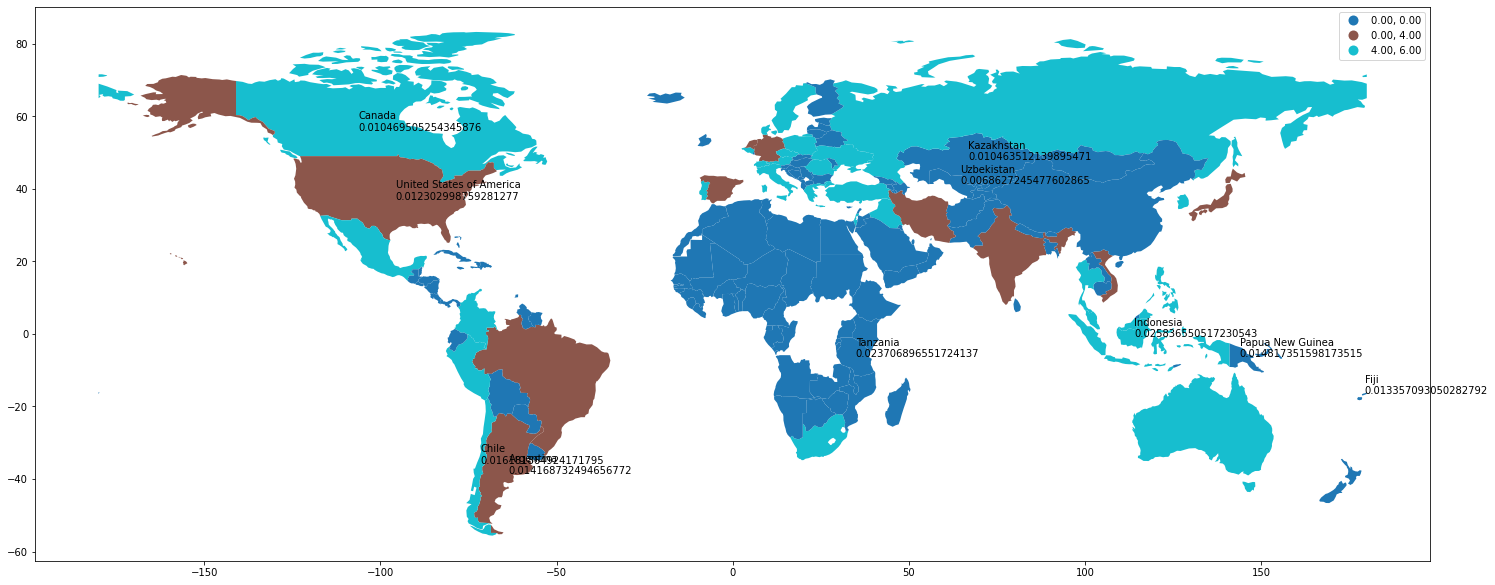

In [296]:
# plot confirmed cases world map 
merge.plot(column='label', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='tab10')
# add countries names and numbers 
for i in range(0,10):
    plt.text(float(merge.longitude[i]),float(merge.latitude[i]),"{}\n{}".format(merge.name[i],merge['Deaths/Cases'][i]),size=10)
plt.show()

<AxesSubplot:xlabel='GDP (nominal, 2017)', ylabel='Tot\xa0Cases/1M pop'>

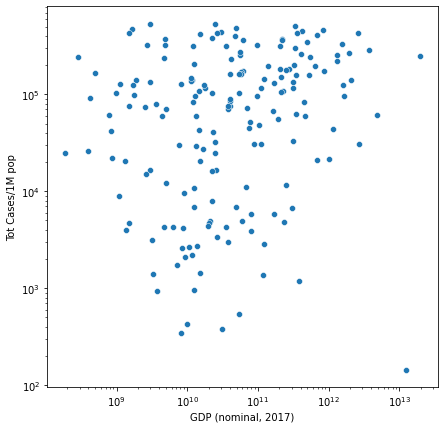

In [322]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.scatterplot(x='GDP (nominal, 2017)', y='Deaths/Cases', data=df,ax = ax)